In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor

Excluding REB

In [19]:
df = pd.read_csv('DataCleaned.csv')
df

,FG_PCT,FT_PCT,FG3_PCT,AST,REB,PTS,Home_Away
0,0.642,0.880,0.364,30,50,134,1
1,0.539,0.714,0.545,34,48,124,1
2,0.543,0.706,0.500,39,48,133,1
3,0.461,0.750,0.370,24,34,114,1
4,0.382,0.630,0.319,27,45,110,1
...,...,...,...,...,...,...,...
2587,0.317,0.600,0.233,14,47,85,0
2588,0.420,0.765,0.348,32,47,121,0
2589,0.467,0.846,0.314,24,38,106,0
2590,0.430,0.621,0.270,20,45,102,0


In [20]:
y_df = df.pop('PTS')
home_away = df.pop('Home_Away')
rebs = df.pop("REB")

     
y = y_df.to_numpy()
X = df.to_numpy()

In [21]:
df

,FG_PCT,FT_PCT,FG3_PCT,AST
0,0.642,0.880,0.364,30
1,0.539,0.714,0.545,34
2,0.543,0.706,0.500,39
3,0.461,0.750,0.370,24
4,0.382,0.630,0.319,27
...,...,...,...,...
2587,0.317,0.600,0.233,14
2588,0.420,0.765,0.348,32
2589,0.467,0.846,0.314,24
2590,0.430,0.621,0.270,20


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
reg = LinearRegression().fit(X_train, y_train)
bayes = BayesianRidge().fit(X_train, y_train)
rfr = RandomForestRegressor(n_estimators = 20, max_depth = 4).fit(X_train, y_train)

print('Linear Regresssion:\n')
print('coefficients: ' + str(reg.coef_))
print('intercept: ' + str(reg.intercept_))
print('score: ' + str(reg.score(X_test, y_test)))
print('\n')

print('Bayesian Ridge Regresssion:\n')
print('coefficients: ' + str(bayes.coef_))
print('intercept: ' + str(bayes.intercept_))
print('score: ' + str(bayes.score(X_test, y_test)))
print('\n')

print('Random Forest Regresssion:\n')
print('score: ' + str(rfr.score(X_test, y_test)))
print('\n')

prediction_reg = []
actual_reg = []

prediction_bayes = []
actual_bayes = []

prediction_rfr = []
actual_rfr = []

for i in range(len(y_test)):
  prediction_reg.append(reg.predict([X_test[i]])[0])
  actual_reg.append(y_test[i])

  prediction_bayes.append(bayes.predict([X_test[i]])[0])
  actual_bayes.append(y_test[i])

  prediction_rfr.append(rfr.predict([X_test[i]])[0])
  actual_rfr.append(y_test[i])

Linear Regresssion:

coefficients: [111.80303185  14.9503815   29.123238     0.6385564 ]
intercept: 21.465443387496222
score: 0.6621386723149134


Bayesian Ridge Regresssion:

coefficients: [111.31892889  14.9445685   29.20696708   0.641081  ]
intercept: 21.601563843611743
score: 0.6621284128064984


Random Forest Regresssion:

score: 0.6315901579507448




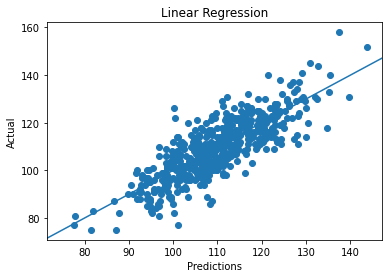

MSE: 53.487401371217416
Mean Absolute Error: 5.787754786105812




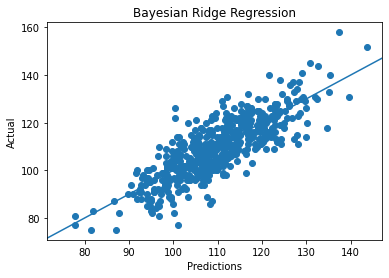

MSE: 53.489025571442475
Mean Absolute Error: 5.788596332244674




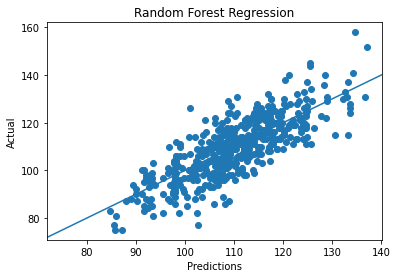

MSE: 58.32358863267773
Mean Absolute Error: 6.039907576077179


In [24]:
plt.scatter(prediction_reg, actual_reg)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Linear Regression')
plt.axline((75, 75), slope=1)
plt.show()
print("MSE: " + str(mean_squared_error(actual_reg, prediction_reg)))
print("Mean Absolute Error: " + str(mean_absolute_error(actual_reg, prediction_reg)))
print("\n")

plt.scatter(prediction_bayes, actual_bayes)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Bayesian Ridge Regression')
plt.axline((75, 75), slope=1)
plt.show()
print("MSE: " + str(mean_squared_error(actual_bayes, prediction_bayes)))
print("Mean Absolute Error: " + str(mean_absolute_error(actual_bayes, prediction_bayes)))
print("\n")

plt.scatter(prediction_rfr, actual_rfr)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Random Forest Regression')
plt.axline((75, 75), slope=1)
plt.show()
print("MSE: " + str(mean_squared_error(actual_rfr, prediction_rfr)))
print("Mean Absolute Error: " + str(mean_absolute_error(actual_rfr, prediction_rfr)))

Excluding AST

In [25]:
df = pd.read_csv('DataCleaned.csv')
df

,FG_PCT,FT_PCT,FG3_PCT,AST,REB,PTS,Home_Away
0,0.642,0.880,0.364,30,50,134,1
1,0.539,0.714,0.545,34,48,124,1
2,0.543,0.706,0.500,39,48,133,1
3,0.461,0.750,0.370,24,34,114,1
4,0.382,0.630,0.319,27,45,110,1
...,...,...,...,...,...,...,...
2587,0.317,0.600,0.233,14,47,85,0
2588,0.420,0.765,0.348,32,47,121,0
2589,0.467,0.846,0.314,24,38,106,0
2590,0.430,0.621,0.270,20,45,102,0


In [26]:
y_df = df.pop('PTS')
home_away = df.pop('Home_Away')
rebs = df.pop("AST")

     
y = y_df.to_numpy()
X = df.to_numpy()

In [27]:
df

,FG_PCT,FT_PCT,FG3_PCT,REB
0,0.642,0.880,0.364,50
1,0.539,0.714,0.545,48
2,0.543,0.706,0.500,48
3,0.461,0.750,0.370,34
4,0.382,0.630,0.319,45
...,...,...,...,...
2587,0.317,0.600,0.233,47
2588,0.420,0.765,0.348,47
2589,0.467,0.846,0.314,38
2590,0.430,0.621,0.270,45


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
reg = LinearRegression().fit(X_train, y_train)
bayes = BayesianRidge().fit(X_train, y_train)
rfr = RandomForestRegressor(n_estimators = 20, max_depth = 4).fit(X_train, y_train)

print('Linear Regresssion:\n')
print('coefficients: ' + str(reg.coef_))
print('intercept: ' + str(reg.intercept_))
print('score: ' + str(reg.score(X_test, y_test)))
print('\n')

print('Bayesian Ridge Regresssion:\n')
print('coefficients: ' + str(bayes.coef_))
print('intercept: ' + str(bayes.intercept_))
print('score: ' + str(bayes.score(X_test, y_test)))
print('\n')

print('Random Forest Regresssion:\n')
print('score: ' + str(rfr.score(X_test, y_test)))
print('\n')

prediction_reg = []
actual_reg = []

prediction_bayes = []
actual_bayes = []

prediction_rfr = []
actual_rfr = []

for i in range(len(y_test)):
  prediction_reg.append(reg.predict([X_test[i]])[0])
  actual_reg.append(y_test[i])

  prediction_bayes.append(bayes.predict([X_test[i]])[0])
  actual_bayes.append(y_test[i])

  prediction_rfr.append(rfr.predict([X_test[i]])[0])
  actual_rfr.append(y_test[i])

Linear Regresssion:

coefficients: [149.45084025  16.22055894  35.52695484   0.45383468]
intercept: -3.6653248169583748
score: 0.6763690279987462


Bayesian Ridge Regresssion:

coefficients: [149.17326723  16.21653013  35.60926456   0.45355341]
intercept: -3.550587665751408
score: 0.6763559267920599


Random Forest Regresssion:

score: 0.6336898605448205




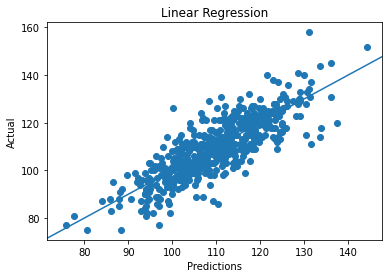

MSE: 51.23456956199125
Mean Absolute Error: 5.558329133968218




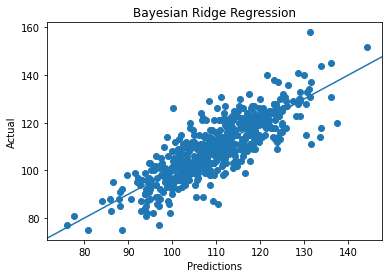

MSE: 51.23664363630237
Mean Absolute Error: 5.558418189755658




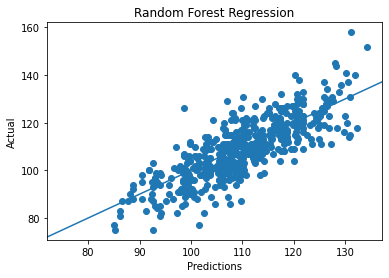

MSE: 57.99118114414091
Mean Absolute Error: 5.9823115652075325


In [30]:
plt.scatter(prediction_reg, actual_reg)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Linear Regression')
plt.axline((75, 75), slope=1)
plt.show()
print("MSE: " + str(mean_squared_error(actual_reg, prediction_reg)))
print("Mean Absolute Error: " + str(mean_absolute_error(actual_reg, prediction_reg)))
print("\n")

plt.scatter(prediction_bayes, actual_bayes)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Bayesian Ridge Regression')
plt.axline((75, 75), slope=1)
plt.show()
print("MSE: " + str(mean_squared_error(actual_bayes, prediction_bayes)))
print("Mean Absolute Error: " + str(mean_absolute_error(actual_bayes, prediction_bayes)))
print("\n")

plt.scatter(prediction_rfr, actual_rfr)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Random Forest Regression')
plt.axline((75, 75), slope=1)
plt.show()
print("MSE: " + str(mean_squared_error(actual_rfr, prediction_rfr)))
print("Mean Absolute Error: " + str(mean_absolute_error(actual_rfr, prediction_rfr)))

Excluding both REB and AST

In [31]:
df = pd.read_csv('DataCleaned.csv')
df

,FG_PCT,FT_PCT,FG3_PCT,AST,REB,PTS,Home_Away
0,0.642,0.880,0.364,30,50,134,1
1,0.539,0.714,0.545,34,48,124,1
2,0.543,0.706,0.500,39,48,133,1
3,0.461,0.750,0.370,24,34,114,1
4,0.382,0.630,0.319,27,45,110,1
...,...,...,...,...,...,...,...
2587,0.317,0.600,0.233,14,47,85,0
2588,0.420,0.765,0.348,32,47,121,0
2589,0.467,0.846,0.314,24,38,106,0
2590,0.430,0.621,0.270,20,45,102,0


In [32]:
y_df = df.pop('PTS')
home_away = df.pop('Home_Away')
rebs = df.pop("REB")
asts = df.pop("AST")


     
y = y_df.to_numpy()
X = df.to_numpy()

In [33]:
df

,FG_PCT,FT_PCT,FG3_PCT
0,0.642,0.880,0.364
1,0.539,0.714,0.545
2,0.543,0.706,0.500
3,0.461,0.750,0.370
4,0.382,0.630,0.319
...,...,...,...
2587,0.317,0.600,0.233
2588,0.420,0.765,0.348
2589,0.467,0.846,0.314
2590,0.430,0.621,0.270


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
reg = LinearRegression().fit(X_train, y_train)
bayes = BayesianRidge().fit(X_train, y_train)
rfr = RandomForestRegressor(n_estimators = 20, max_depth = 4).fit(X_train, y_train)

print('Linear Regresssion:\n')
print('coefficients: ' + str(reg.coef_))
print('intercept: ' + str(reg.intercept_))
print('score: ' + str(reg.score(X_test, y_test)))
print('\n')

print('Bayesian Ridge Regresssion:\n')
print('coefficients: ' + str(bayes.coef_))
print('intercept: ' + str(bayes.intercept_))
print('score: ' + str(bayes.score(X_test, y_test)))
print('\n')

print('Random Forest Regresssion:\n')
print('score: ' + str(rfr.score(X_test, y_test)))
print('\n')

prediction_reg = []
actual_reg = []

prediction_bayes = []
actual_bayes = []

prediction_rfr = []
actual_rfr = []

for i in range(len(y_test)):
  prediction_reg.append(reg.predict([X_test[i]])[0])
  actual_reg.append(y_test[i])

  prediction_bayes.append(bayes.predict([X_test[i]])[0])
  actual_bayes.append(y_test[i])

  prediction_rfr.append(rfr.predict([X_test[i]])[0])
  actual_rfr.append(y_test[i])

Linear Regresssion:

coefficients: [141.1428415   14.81588108  35.30408368]
intercept: 21.59619395359759
score: 0.6222768942558533


Bayesian Ridge Regresssion:

coefficients: [140.89323683  14.81318391  35.37844537]
intercept: 21.687241078822908
score: 0.622264335213162


Random Forest Regresssion:

score: 0.60574009985637




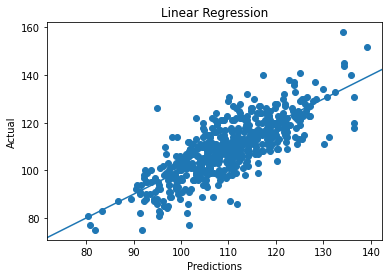

MSE: 59.797987246859925
Mean Absolute Error: 5.972552607042916




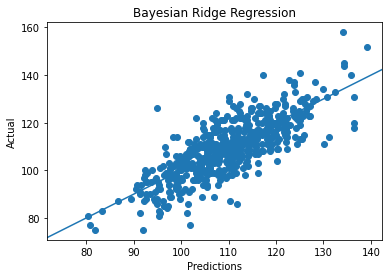

MSE: 59.79997549026696
Mean Absolute Error: 5.972642605827853




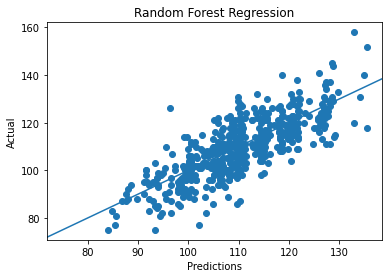

MSE: 62.41595529161614
Mean Absolute Error: 6.22159994959159


In [36]:
plt.scatter(prediction_reg, actual_reg)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Linear Regression')
plt.axline((75, 75), slope=1)
plt.show()
print("MSE: " + str(mean_squared_error(actual_reg, prediction_reg)))
print("Mean Absolute Error: " + str(mean_absolute_error(actual_reg, prediction_reg)))
print("\n")

plt.scatter(prediction_bayes, actual_bayes)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Bayesian Ridge Regression')
plt.axline((75, 75), slope=1)
plt.show()
print("MSE: " + str(mean_squared_error(actual_bayes, prediction_bayes)))
print("Mean Absolute Error: " + str(mean_absolute_error(actual_bayes, prediction_bayes)))
print("\n")

plt.scatter(prediction_rfr, actual_rfr)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Random Forest Regression')
plt.axline((75, 75), slope=1)
plt.show()
print("MSE: " + str(mean_squared_error(actual_rfr, prediction_rfr)))
print("Mean Absolute Error: " + str(mean_absolute_error(actual_rfr, prediction_rfr)))